**MI MOBILE ANALYSIS**

Import all neccesity libraries

In [129]:
from bs4 import BeautifulSoup 
import requests 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Scraping data from flipkart using html parser and consisting of product name and name

In [130]:
page_num=input("Enter number of pages : ")
name1=[]
price1=[]
for i in range(1, int(page_num)+1):
  url="https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&otracker=nmenu_sub_Electronics_0_Mi&page="+str(i)
  req=requests.get(url)
  content=BeautifulSoup(req.content, 'html.parser')
  name=content.find_all('div',{'class','_4rR01T'})
  price=content.find_all('div',{'class','_30jeq3 _1_WHN1'})
  print("length of page",str(i),'is',len(name))
  for i in name:
    name1.append(i.text)
  for i in price:
    price1.append(i.text)  

Enter number of pages : 4
length of page 1 is 24
length of page 2 is 24
length of page 3 is 24
length of page 4 is 24


Amount of data that has been scraped

In [131]:
print(len(name1))
print(len(price1))

96
96


Creating a dataframe for scraped data

In [132]:
data={
    "Title":name1,
    "Price":price1
}
df=pd.DataFrame(data)
df

,Title,Price
0,"Redmi 9A Sport (Coral Green, 32 GB)","₹6,803"
1,"Redmi 9A Sport (Carbon Black, 32 GB)","₹6,796"
2,"Redmi Note 11 (Starburst White, 128 GB)","₹15,999"
3,"Redmi Note 11 (Horizon Blue, 64 GB)","₹12,999"
4,"Redmi 9A Sport (Metallic Blue, 32 GB)","₹6,816"
...,...,...
91,"Mi 11 Lite (Tuscany Coral, 128 GB)","₹21,999"
92,"Redmi Note 11 (Starburst White, 64 GB)","₹12,790"
93,"REDMI Note 11 Pro (Phantom White, 128 GB)","₹18,495"
94,"10 Prime (Astral White, 128 GB)","₹16,999"


Top 5 records of dataset

In [133]:
df.head()

,Title,Price
0,"Redmi 9A Sport (Coral Green, 32 GB)","₹6,803"
1,"Redmi 9A Sport (Carbon Black, 32 GB)","₹6,796"
2,"Redmi Note 11 (Starburst White, 128 GB)","₹15,999"
3,"Redmi Note 11 (Horizon Blue, 64 GB)","₹12,999"
4,"Redmi 9A Sport (Metallic Blue, 32 GB)","₹6,816"


Information regarding values in the dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   96 non-null     object
 1   Price   96 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


size of the dataset

In [135]:
df.drop_duplicates(inplace = True)
df.shape

(94, 2)

In [136]:
df.dropna(inplace = True)
df.head()

,Title,Price
0,"Redmi 9A Sport (Coral Green, 32 GB)","₹6,803"
1,"Redmi 9A Sport (Carbon Black, 32 GB)","₹6,796"
2,"Redmi Note 11 (Starburst White, 128 GB)","₹15,999"
3,"Redmi Note 11 (Horizon Blue, 64 GB)","₹12,999"
4,"Redmi 9A Sport (Metallic Blue, 32 GB)","₹6,816"


Datatypes of the dataset attributes

In [137]:
df.dtypes

Title    object
Price    object
dtype: object

Splitting the title attribute to model and it's respective properties

In [138]:
df['model'],df['properties']=df['Title'].str.split('(',1).str
del df['Title']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,Price,model,properties
0,"₹6,803",Redmi 9A Sport,"Coral Green, 32 GB)"
1,"₹6,796",Redmi 9A Sport,"Carbon Black, 32 GB)"
2,"₹15,999",Redmi Note 11,"Starburst White, 128 GB)"
3,"₹12,999",Redmi Note 11,"Horizon Blue, 64 GB)"
4,"₹6,816",Redmi 9A Sport,"Metallic Blue, 32 GB)"
...,...,...,...
91,"₹21,999",Mi 11 Lite,"Tuscany Coral, 128 GB)"
92,"₹12,790",Redmi Note 11,"Starburst White, 64 GB)"
93,"₹18,495",REDMI Note 11 Pro,"Phantom White, 128 GB)"
94,"₹16,999",10 Prime,"Astral White, 128 GB)"


Splitting the properties into RAM and its color

In [139]:
df['color'],df['RAM']=df['properties'].str.split(',',1).str
del df['properties']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,Price,model,color,RAM
0,"₹6,803",Redmi 9A Sport,Coral Green,32 GB)
1,"₹6,796",Redmi 9A Sport,Carbon Black,32 GB)
2,"₹15,999",Redmi Note 11,Starburst White,128 GB)
3,"₹12,999",Redmi Note 11,Horizon Blue,64 GB)
4,"₹6,816",Redmi 9A Sport,Metallic Blue,32 GB)


Datatypes of all dataset attributes

In [140]:
df.dtypes

Price    object
model    object
color    object
RAM      object
dtype: object

Checking NULL values in the dataset

In [141]:
df.isnull()

,Price,model,color,RAM
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
91,False,False,False,False
92,False,False,False,False
93,False,False,False,False
94,False,False,False,False


Count of null values in the dataset

In [142]:
df.isnull().sum()

Price    0
model    0
color    0
RAM      0
dtype: int64

Number of unique values in the model

In [143]:
df['model'].nunique()

31

In [144]:
df['model'].value_counts()

Redmi Note 11                    13
Redmi Note 11 PRO Plus 5G         9
REDMI 10A                         7
Redmi 9A Sport                    6
10 Prime                          5
Redmi 9A                          5
REDMI Note 11 Pro                 5
Xiaomi 11i Hypercharge 5G         5
Redmi 8                           4
Mi 11 Lite                        3
Redmi 8A Dual                     3
Xiaomi 11i 5G                     3
Redmi 5A                          2
Redmi Note 7S                     2
REDMI Note 11T 5G                 2
Redmi Note 7 Pro                  2
Xiaomi 11Lite NE                  2
Redmi 9                           2
REDMI 10 Power                    2
Redmi 7A                          1
Xiaomi 11T Pro 5G Hyperphone      1
Redmi Note 9 Pro                  1
Redmi 8A                          1
Mi 10T                            1
Redmi Note 4                      1
Redmi 5                           1
Redmi Note 8                      1
Redmi Note 5 Pro            

Conversion of object datatype into int datatype

In [145]:
df['Price'] = df['Price'].str.replace(r'₹', '')
df['Price'] = df['Price'].str.replace(r',', '')
df['Price'] = df['Price'].astype(str).astype(int)

Mathematical statistice of dataset

In [146]:
df.describe()

,Price
count,94.000000
mean,15586.351064
std,7242.402917
min,5999.000000
25%,9305.000000
50%,13737.000000
75%,20915.500000
max,37990.000000


In [147]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51,
            52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91, 92, 93, 94, 95],
           dtype='int64')

In [148]:
df.columns

Index(['Price', 'model', 'color', 'RAM'], dtype='object')

Barplot of Price and Model

Text(0.5, 1.0, 'Price vs Model')

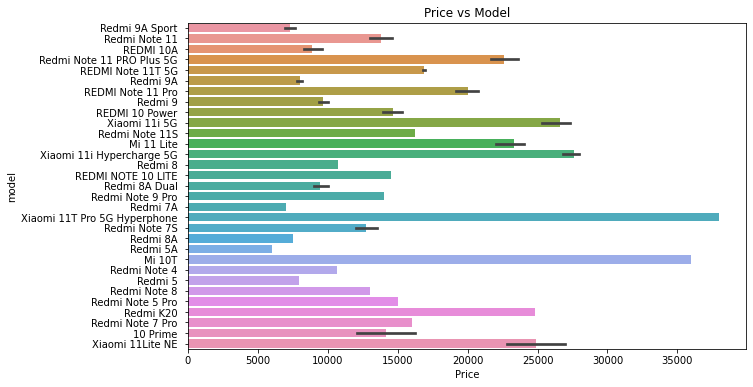

In [149]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Price'],y=df['model'])
plt.title('Price vs Model')

Barplot of RAM and Price

Text(0.5, 1.0, 'RAM vs Price')

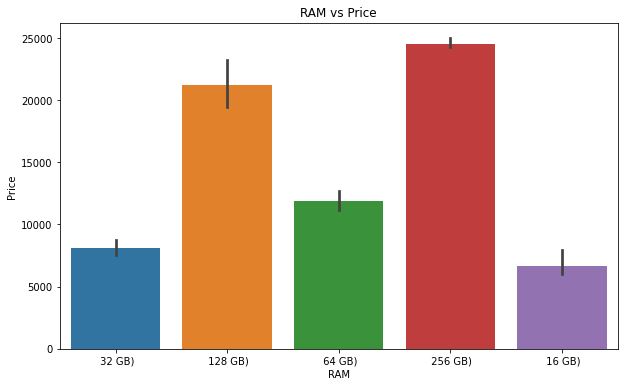

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['RAM'],y=df['Price'])
plt.title('RAM vs Price')

Boxplot of Price column

Text(0.5, 1.0, 'Model Price')

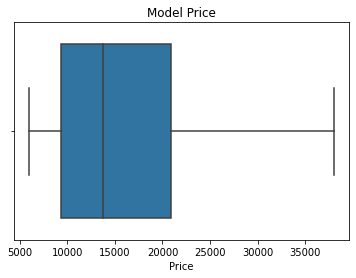

In [151]:
sns.boxplot(x=df['Price'])
plt.title('Model Price')

***CONCLUSION *** From the above visualization, my analysis is that product are with Price constraint 10,000 to 20,000 with low RAM memory and price will be increased as RAM sizes increases and no outliers are in the dataset